In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("D:/Data Analytics/PORTFOLIO_PROJECTS/_python_/web_scraping/flipkart_cleaned.csv")
df

,Product Name,Brand,Prices,RAM,ROM,Ratings
0,"SAMSUNG Galaxy F55 5G (Raisin Black, 128 GB)",SAMSUNG,26999,8 GB RAM,128 GB ROM,0.0
1,"SAMSUNG Galaxy F55 5G (Apricot Crush, 128 GB)",SAMSUNG,26999,8 GB RAM,128 GB ROM,0.0
2,"SAMSUNG Galaxy S23 5G (Green, 128 GB)",SAMSUNG,46999,8 GB RAM,128 GB ROM,4.5
3,"SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB)",SAMSUNG,46999,8 GB RAM,128 GB ROM,4.5
4,"SAMSUNG Galaxy S23 FE (Graphite, 256 GB)",SAMSUNG,39999,8 GB RAM,256 GB ROM,4.3
...,...,...,...,...,...,...
197,"OnePlus 10R (Sierra Black, 128 GB)",OnePlus,30498,8 GB RAM,128 GB ROM,4.3
198,"OnePlus 10R 5G (Sierra Black, 256 GB)",OnePlus,39999,12 GB RAM,256 GB ROM,4.2
199,"SAMSUNG Galaxy A52s 5G (Awesome Black, 128 GB)",SAMSUNG,37999,8 GB RAM,128 GB ROM,4.2
200,"SAMSUNG Galaxy A52s 5G (Awesome White, 128 GB)",SAMSUNG,37999,8 GB RAM,128 GB ROM,4.2


In [23]:
# Computing basic summary statistics (mean, median, min, max, std, etc.)
print(df.describe())

             Prices     Ratings
count    202.000000  202.000000
mean   36691.861386    4.161386
std    12435.268494    0.862943
min        0.000000    0.000000
25%    35074.250000    4.200000
50%    37999.000000    4.300000
75%    43829.250000    4.500000
max    83000.000000    4.600000


In [24]:
# Importing library for visualizations
import matplotlib.pyplot as plt

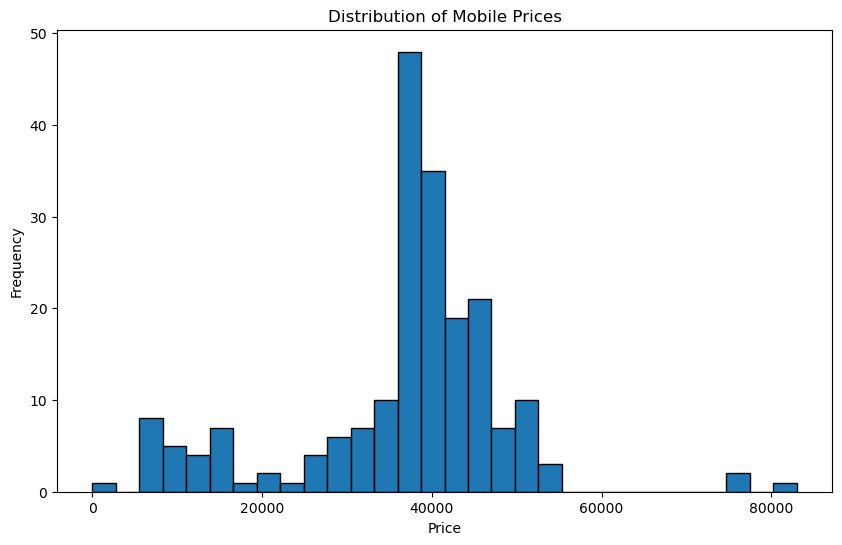

In [25]:
# DATA DISTRIBUTION
# 1.Distribution of Prices to understand the range and common price points.
plt.figure(figsize=(10, 6))
plt.hist(df['Prices'], bins=30, edgecolor='black')
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

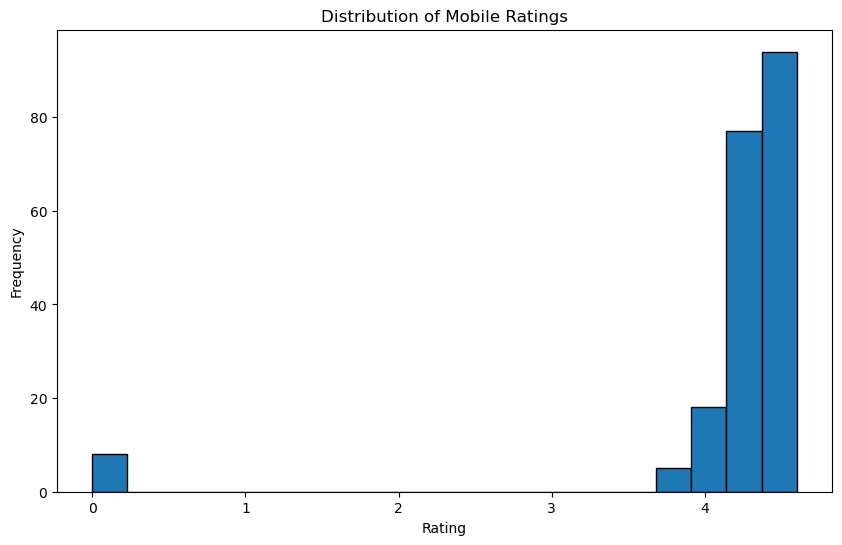

In [26]:
# 2.Distribution of Ratings to see the spread of user ratings.
plt.figure(figsize=(10, 6))
plt.hist(df['Ratings'], bins=20, edgecolor='black')
plt.title('Distribution of Mobile Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

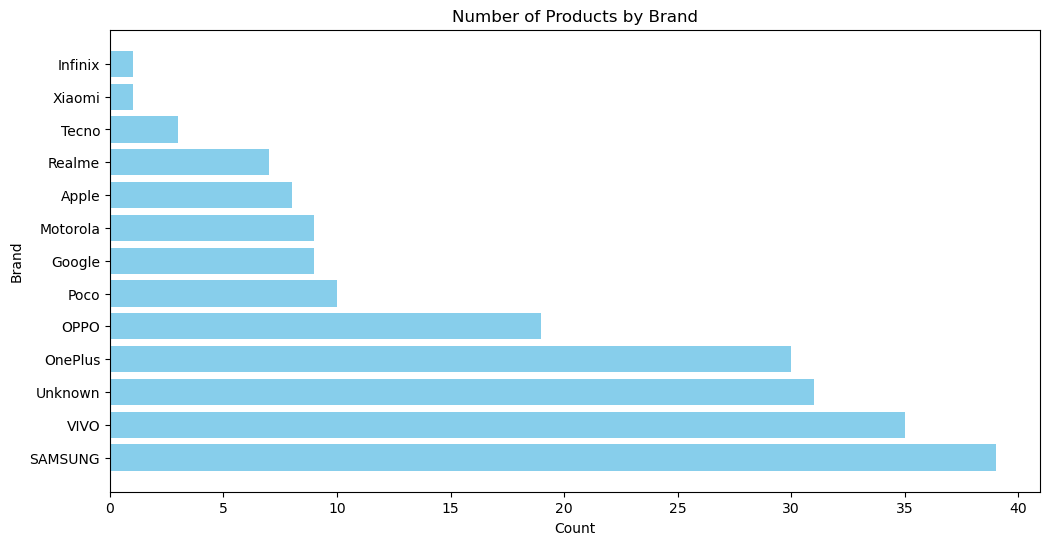

In [27]:
# BRAND ANALYSIS
# 1.Top Brands by Count to count the number of products by each brand.
plt.figure(figsize=(12, 6))
brand_counts = df['Brand'].value_counts()
plt.barh(brand_counts.index, brand_counts.values, color='skyblue')
plt.title('Number of Products by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

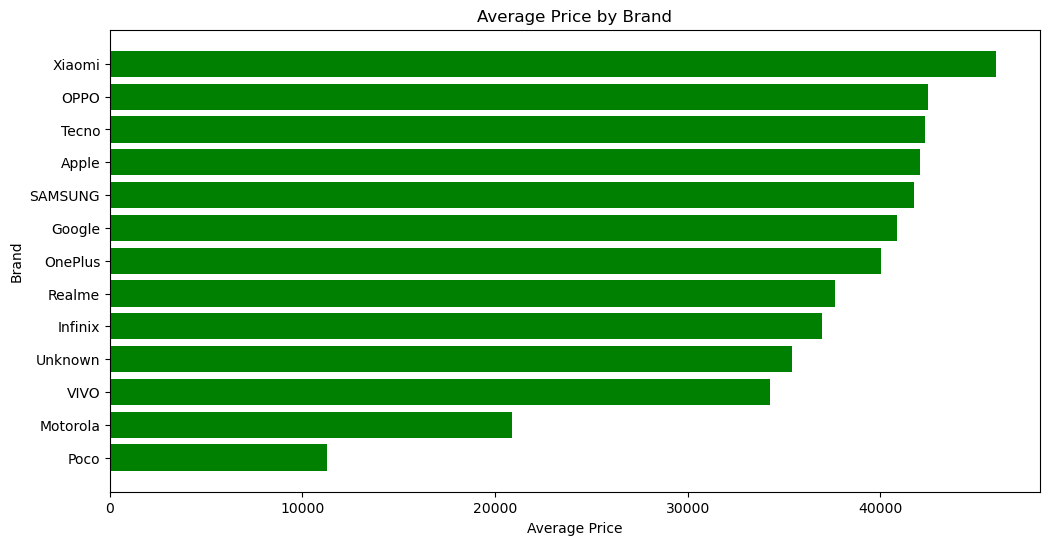

In [28]:
# 2.Plotting Average Price of mobiles by Brand
plt.figure(figsize=(12, 6))
avg_price_by_brand = df.groupby('Brand')['Prices'].mean().sort_values()
plt.barh(avg_price_by_brand.index, avg_price_by_brand.values, color='green')
plt.title('Average Price by Brand')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

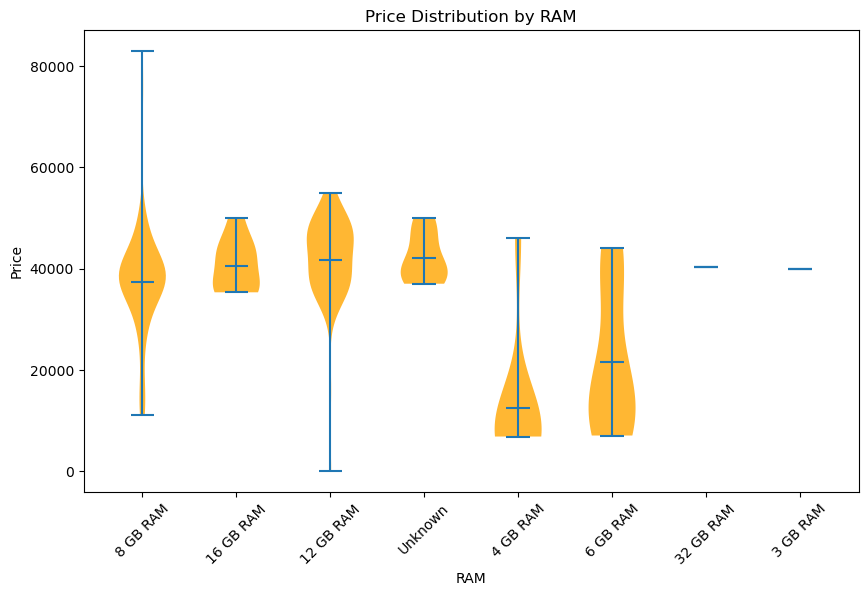

In [42]:
# RAM & ROM ANALYSIS
# 1.RAM vs Price using Violin Plot to analyze how the amount of RAM affects the price
plt.figure(figsize=(10, 6))
parts = plt.violinplot([df[df['RAM'] == ram]['Prices'] for ram in df['RAM'].unique()], showmeans=True)

color = 'orange'
for pc in parts['bodies']:
    pc.set_facecolor(color)
    pc.set_alpha(0.8)

plt.xticks(range(1, len(df['RAM'].unique()) + 1), df['RAM'].unique(), rotation=45)
plt.title('Price Distribution by RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

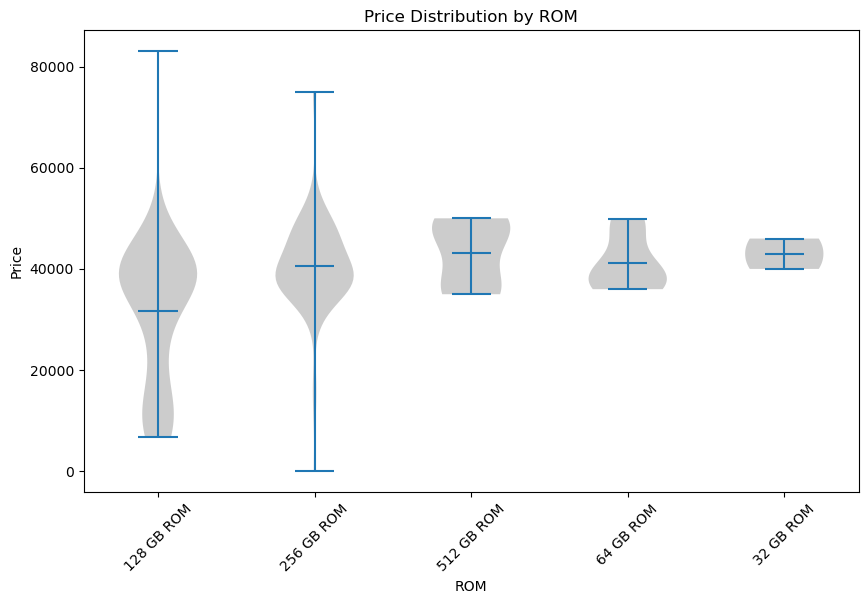

In [58]:
# 2.ROM vs Price using Violin Plot to analyze how the amount of ROM affects the price.
plt.figure(figsize=(10, 6))
parts = plt.violinplot([df[df['ROM'] == rom]['Prices'] for rom in df['ROM'].unique()], showmeans=True)

color = 'silver'
for pc in parts['bodies']:
    pc.set_facecolor(color)
    pc.set_alpha(0.8)

plt.xticks(range(1, len(df['ROM'].unique()) + 1), df['ROM'].unique(), rotation=45)
plt.title('Price Distribution by ROM')
plt.xlabel('ROM')
plt.ylabel('Price')
plt.show()

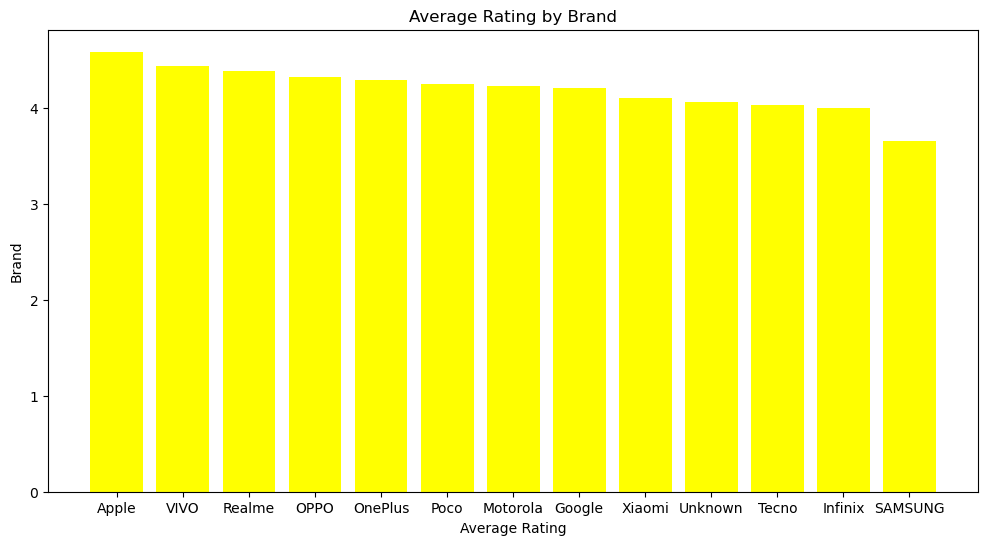

In [72]:
# RATINGS ANALYSIS
# 1.Top Rated Brands by plotting the average rating for each brand
plt.figure(figsize=(12, 6))
avg_rating_by_brand = df.groupby('Brand')['Ratings'].mean().sort_values(ascending = False)
plt.bar(avg_rating_by_brand.index, avg_rating_by_brand.values, color='yellow')
plt.title('Average Rating by Brand')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.show()

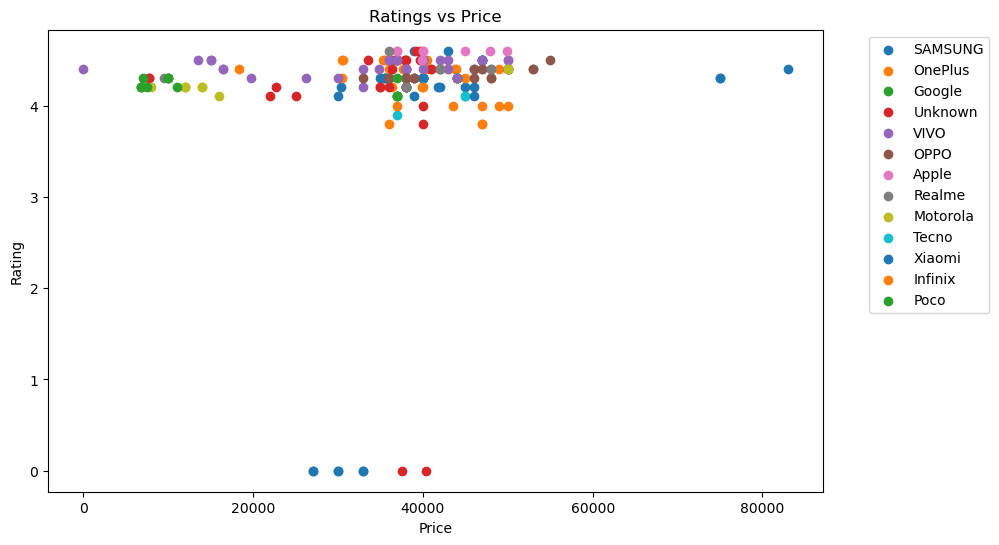

In [74]:
# Ratings vs Price
plt.figure(figsize=(10, 6))
for brand in df['Brand'].unique():
    subset = df[df['Brand'] == brand]
    plt.scatter(subset['Prices'], subset['Ratings'], label=brand)

plt.title('Ratings vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()